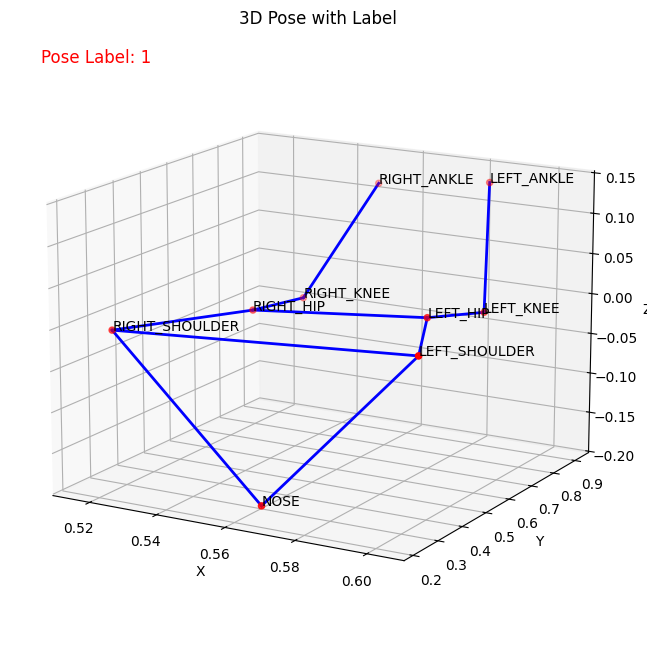

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đọc dữ liệu từ CSV
df = pd.read_csv("dataset/train.csv")

# Lấy label từ cột đầu tiên
pose_label = df.iloc[0, 0]  # Lấy label của frame đầu tiên

# Bỏ cột label để chỉ lấy tọa độ keypoints
df = df.iloc[:, 1:]

# Danh sách keypoints cần vẽ
keypoints = [
    "NOSE", "LEFT_SHOULDER", "RIGHT_SHOULDER",
    "LEFT_HIP", "RIGHT_HIP", "LEFT_KNEE", "RIGHT_KNEE",
    "LEFT_ANKLE", "RIGHT_ANKLE"
]

# Các cặp nối khớp để tạo skeleton
connections = [
    ("NOSE", "LEFT_SHOULDER"), ("NOSE", "RIGHT_SHOULDER"),
    ("LEFT_SHOULDER", "RIGHT_SHOULDER"),
    ("LEFT_SHOULDER", "LEFT_HIP"), ("RIGHT_SHOULDER", "RIGHT_HIP"),
    ("LEFT_HIP", "RIGHT_HIP"), ("LEFT_HIP", "LEFT_KNEE"), ("RIGHT_HIP", "RIGHT_KNEE"),
    ("LEFT_KNEE", "LEFT_ANKLE"), ("RIGHT_KNEE", "RIGHT_ANKLE")
]

# Lấy frame đầu tiên từ dữ liệu CSV
row = df.iloc[0]

# Trích xuất tọa độ x, y, z, visibility từ CSV
keypoints_xyz = {
    kp: (row[f"{kp}_x"], row[f"{kp}_y"], row[f"{kp}_z"], row[f"{kp}_visibility"])
    for kp in keypoints
}

# Chỉ lấy keypoints có visibility > 0.5
keypoints_xyz = {kp: xyz[:3] for kp, xyz in keypoints_xyz.items() if xyz[3] > 0.5}

# Chuyển thành numpy array để dễ vẽ
xy_array = np.array(list(keypoints_xyz.values()))

# Vẽ keypoints và khung xương 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm keypoints
ax.scatter(xy_array[:, 0], xy_array[:, 1], xy_array[:, 2], color='red', marker='o')

# Vẽ đường nối các khớp
for kp1, kp2 in connections:
    if kp1 in keypoints_xyz and kp2 in keypoints_xyz:
        x_values = [keypoints_xyz[kp1][0], keypoints_xyz[kp2][0]]
        y_values = [keypoints_xyz[kp1][1], keypoints_xyz[kp2][1]]
        z_values = [keypoints_xyz[kp1][2], keypoints_xyz[kp2][2]]
        ax.plot(x_values, y_values, z_values, 'blue', linewidth=2)

# Hiển thị nhãn keypoints trên biểu đồ
for kp, (x, y, z) in keypoints_xyz.items():
    ax.text(x, y, z, kp, fontsize=10, color='black')

# Hiển thị label của pose trên đồ thị
ax.text2D(0.05, 0.95, f"Pose Label: {pose_label}", transform=ax.transAxes, fontsize=12, color='red')

# Thiết lập góc nhìn
ax.view_init(elev=15, azim=-60)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Pose with Label")
plt.show()
